#### Process ERA5-Land Data
/g/data/zz93/era5-land/reanalysis/  
hourly data, 0.1 degree resolution.  

**Potential Variables of Interest**  
e: land total_evaporation, units = **m**    
es: land snow_evaporation  
evabs: land evaporation_from_bare_soil  
evaow: land evaporation_from_open_water_surfaces_excluding_oceans  
evatc: land evaporation_from_the_top_of_canopy  
evavt: ERA5 land evaporation_from_vegetation_transpiration  
pev: Potential evaporation  
ro: Runoff, units = **m**  
sro: Surface runoff
ssro: Sub-surface runoff  
swvl1:  land volumetric_soil_water_layer_1  
swvl2:  Volumetric soil water layer 2  
swvl3:  Volumetric soil water layer 3  
swvl4:  Volumetric soil water layer 4  
tp: Total precipitation, units = **m**

**Spatial Subset for Australia**  
latitude = -44 to -10  
longitude = 112 to 154  

In [1]:
import numpy as np
import xarray as xr
import climtas
import os

# creating information required for weekly accumulations
week_names = list(range(2, 13, 2))
ndays = list(range(14, 13*14, 14))
start_day = ['1981-01-01'] * len(week_names)

end_day = ['2020-05-28',   #2
           '2020-05-28',   #4
           '2020-04-30',   #6
           '2020-05-28',   #8
           '2020-04-16',   #10
           '2020-04-30'    #12
          ]
time_chunk = [x*24 for x in [378,   #2
              336,   #4
              378,   #6
              336,   #8
              350,   #10
              336    #12
             ]]

day_len_dict = dict(zip(week_names, ndays))
start_day_dict = dict(zip(week_names, start_day))
end_day_dict = dict(zip(week_names, end_day))
time_chunk_dict = dict(zip(week_names, time_chunk))

data_names = ['day_len', 'start_day', 'end_day', 'time_chunk']
values = [day_len_dict, start_day_dict, end_day_dict, time_chunk_dict]
era5Week_dict = dict(zip(data_names, values))

In [20]:
# looking at accumulated variables

era5_dir = '/g/data/zz93/era5-land/reanalysis/'
var_name = 'e'
lat_slice = slice(-10, -44)
lon_slice = slice(112, 154)
time_slice = slice('2019-06-01', '2019-06-30')

era5_files = var_name + '/2019/' + var_name + '*201906*' 
ds = xr.open_mfdataset(era5_dir + era5_files, chunks = {'lat':400,'lon':400})
da_var = ds[var_name].sel(time = time_slice, latitude = lat_slice, longitude = lon_slice)
da_var

<xarray.DataArray 'e' (time: 720, latitude: 341, longitude: 421)>
dask.array<getitem, shape=(720, 341, 421), dtype=float32, chunksize=(720, 341, 421), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 112.0 112.1 112.2 112.3 ... 153.8 153.9 154.0
  * latitude   (latitude) float32 -10.0 -10.1 -10.2 -10.3 ... -43.8 -43.9 -44.0
  * time       (time) datetime64[ns] 2019-06-01 ... 2019-06-30T23:00:00
Attributes:
    units:          m of water equivalent
    long_name:      Evaporation
    standard_name:  lwe_thickness_of_water_evaporation_amount

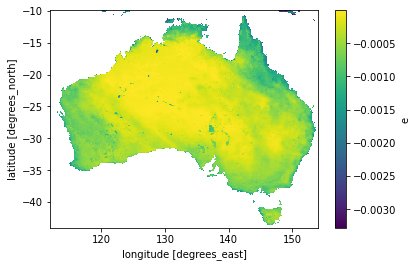

In [21]:
da_var.mean('time').plot()

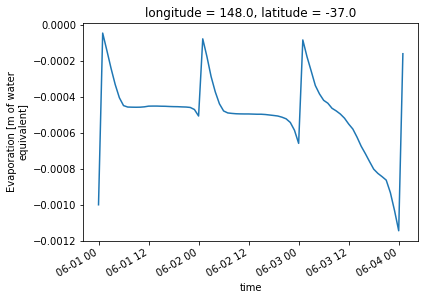

In [27]:
da_var.sel(latitude=-37, longitude=148)[0:74].plot()

In [28]:
da_var.sel(latitude=-37, longitude=148)[0:24]['time']

<xarray.DataArray 'time' (time: 24)>
array(['2019-06-01T00:00:00.000000000', '2019-06-01T01:00:00.000000000',
       '2019-06-01T02:00:00.000000000', '2019-06-01T03:00:00.000000000',
       '2019-06-01T04:00:00.000000000', '2019-06-01T05:00:00.000000000',
       '2019-06-01T06:00:00.000000000', '2019-06-01T07:00:00.000000000',
       '2019-06-01T08:00:00.000000000', '2019-06-01T09:00:00.000000000',
       '2019-06-01T10:00:00.000000000', '2019-06-01T11:00:00.000000000',
       '2019-06-01T12:00:00.000000000', '2019-06-01T13:00:00.000000000',
       '2019-06-01T14:00:00.000000000', '2019-06-01T15:00:00.000000000',
       '2019-06-01T16:00:00.000000000', '2019-06-01T17:00:00.000000000',
       '2019-06-01T18:00:00.000000000', '2019-06-01T19:00:00.000000000',
       '2019-06-01T20:00:00.000000000', '2019-06-01T21:00:00.000000000',
       '2019-06-01T22:00:00.000000000', '2019-06-01T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    longitude  float32 148.0
    latitude   float32 -37.0
  * time       (time) datetime64[ns] 2019-06-01 ... 2019-06-01T23:00:00
Attributes:
    long_name:  time

In [31]:
da_var.sel(latitude=-37, longitude=148)[0:26].values

array([-1.0006744e-03, -4.3466687e-05, -1.4014263e-04, -2.3949426e-04,
       -3.3005606e-04, -4.0380470e-04, -4.4774823e-04, -4.5577344e-04,
       -4.5653712e-04, -4.5691989e-04, -4.5653712e-04, -4.5462698e-04,
       -4.5080576e-04, -4.5042392e-04, -4.5042392e-04, -4.5118760e-04,
       -4.5156945e-04, -4.5271590e-04, -4.5348052e-04, -4.5386236e-04,
       -4.5500882e-04, -4.5577344e-04, -4.5806542e-04, -4.6952907e-04,
       -5.0583109e-04, -7.5564720e-05], dtype=float32)

In [32]:
da_var.sel(da_var['time.hour']

<xarray.DataArray 'hour' (time: 720)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,
...
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])
Coordinates:
  * time     (time) datetime64[ns] 2019-06-01 ... 2019-06-30T23:00:00

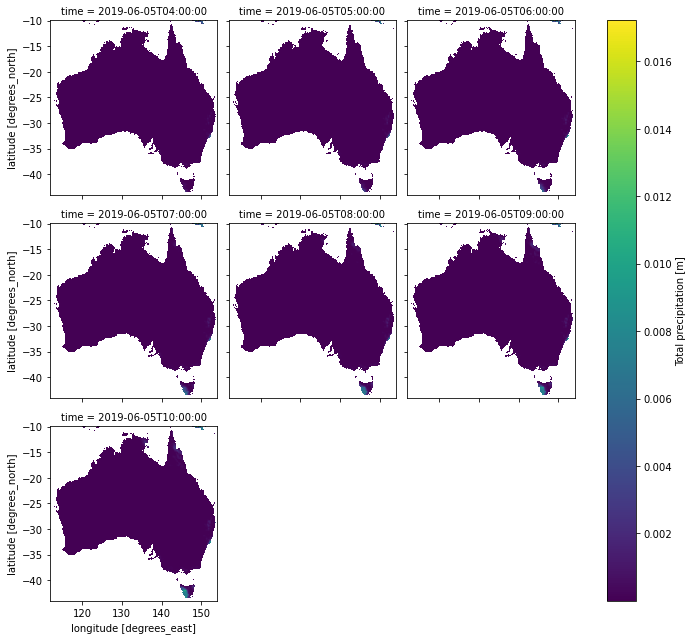

In [14]:
da_var[100:107,:,:].plot(x="longitude", y="latitude", col="time", col_wrap=3)

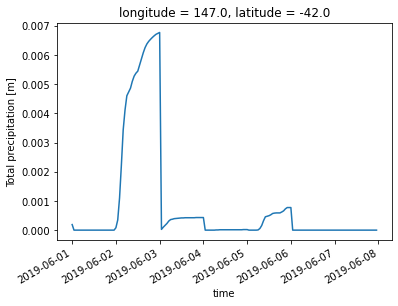

In [16]:
da_var.sel(latitude=-42, longitude=147).plot()

In [32]:
era5_dir = '/g/data/zz93/era5-land/reanalysis/'
var_name = 'tp'
lat_slice = slice(-10, -44)
lon_slice = slice(112, 154)

nWeek = 2
time_slice = slice(era5Week_dict['start_day'][nWeek] + ' 01:00:00', era5Week_dict['end_day'][nWeek] + ' 00:00:00')
time_chunk_dict = {'time': era5Week_dict['time_chunk'][nWeek]}

era5_files = var_name + '/*/' + var_name + '*' 
ds = xr.open_mfdataset(era5_dir + era5_files, chunks = {'lat':400,'lon':400})
da_var = ds[var_name].sel(time = time_slice, latitude = lat_slice, longitude = lon_slice).chunk(chunks = time_chunk_dict).rename({'latitude':'lat','longitude':'lon'})  # time needs to be rechunked for blocked_resample operation
da_var

#da_var_accum = climtas.blocked.blocked_resample(da_var, time = 7*24*nWeek).sum()

<xarray.DataArray 'tp' (time: 345408, lat: 341, lon: 421)>
dask.array<rechunk-merge, shape=(345408, 341, 421), dtype=float32, chunksize=(9072, 341, 421), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 112.0 112.1 112.2 112.3 ... 153.7 153.8 153.9 154.0
  * lat      (lat) float32 -10.0 -10.1 -10.2 -10.3 ... -43.7 -43.8 -43.9 -44.0
  * time     (time) datetime64[ns] 1981-01-01T01:00:00 ... 2020-05-28
Attributes:
    units:      m
    long_name:  Total precipitation

In [50]:
nWeek = 12
time_slice = slice(era5Week_dict['start_day'][nWeek] + ' 01:00:00', era5Week_dict['end_day'][nWeek] + ' 00:00:00')
time_chunk_dict = {'time': era5Week_dict['time_chunk'][nWeek]}

da_var = ds[var_name].sel(time = time_slice, latitude = lat_slice, longitude = lon_slice).chunk(chunks = time_chunk_dict).rename({'latitude':'lat','longitude':'lon'})  # time needs to be rechunked for blocked_resample operation
da_var

da_var_accum = climtas.blocked.blocked_resample(da_var, time = 7*24*nWeek).sum()
da_var_accum

<xarray.DataArray 'tp' (time: 171, lat: 341, lon: 421)>
dask.array<resample_op, shape=(171, 341, 421), dtype=float32, chunksize=(4, 341, 421), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 112.0 112.1 112.2 112.3 ... 153.7 153.8 153.9 154.0
  * lat      (lat) float32 -10.0 -10.1 -10.2 -10.3 ... -43.7 -43.8 -43.9 -44.0
  * time     (time) datetime64[ns] 1981-01-01T01:00:00 ... 2020-02-06T01:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

<xarray.DataArray 'tp' (time: 171, lat: 341, lon: 421)>
dask.array<resample_op, shape=(171, 341, 421), dtype=float32, chunksize=(4, 341, 421), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 112.0 112.1 112.2 112.3 ... 153.7 153.8 153.9 154.0
  * lat      (lat) float32 -10.0 -10.1 -10.2 -10.3 ... -43.7 -43.8 -43.9 -44.0
  * time     (time) datetime64[ns] 1981-01-01T01:00:00 ... 2020-02-06T01:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

In [46]:
import math
dd = da_var.shape[0]/(24*7*nWeek)
extra_dd = (dd - math.floor(dd))*7*nWeek
print('extra days = ' + str(extra_dd))
print('need more days = ' + str(nWeek*7 - extra_dd))

extra days = 3.9999999999994884
need more days = 66.00000000000051


In [36]:
da_var

<xarray.DataArray 'tp' (time: 345408, lat: 341, lon: 421)>
dask.array<rechunk-merge, shape=(345408, 341, 421), dtype=float32, chunksize=(9072, 341, 421), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 112.0 112.1 112.2 112.3 ... 153.7 153.8 153.9 154.0
  * lat      (lat) float32 -10.0 -10.1 -10.2 -10.3 ... -43.7 -43.8 -43.9 -44.0
  * time     (time) datetime64[ns] 1981-01-01T01:00:00 ... 2020-05-28
Attributes:
    units:      m
    long_name:  Total precipitation

In [51]:
era5_sm1_files = 'swvl1/*/swvl1*' 
ds_sm1 = xr.open_mfdataset(era5_dir + era5_sm1_files, chunks = {'lat':400,'lon':400})
ds_sm1

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 354264)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 1981-01-01 ... 2021-05-31T23:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1801, 3600), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-20 23:16:28 UTC+1100 by era5_replication_tools-1.8....
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 land volumetric_soil_water_layer_1 19810101-19810131

In [11]:
ds['longitude']

<xarray.DataArray 'longitude' (longitude: 3600)>
array([-180. , -179.9, -179.8, ...,  179.7,  179.8,  179.9], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
Attributes:
    units:      degrees_east
    long_name:  longitude

In [8]:
ds['time']

<xarray.DataArray 'time' (time: 354263)>
array(['1981-01-01T01:00:00.000000000', '1981-01-01T02:00:00.000000000',
       '1981-01-01T03:00:00.000000000', ..., '2021-05-31T21:00:00.000000000',
       '2021-05-31T22:00:00.000000000', '2021-05-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T01:00:00 ... 2021-05-31T23:00:00
Attributes:
    long_name:  time

In [ ]:
time_slice = slice(allWeek_dict['start_day'][nWeek], allWeek_dict['end_day'][nWeek])
time_chunk_dict = {'time':allWeek_dict['time_chunk'][nWeek]}
da_P = ds[var_name].sel(lat = lat_slice, lon = lon_slice, time = time_slice).chunk(chunks = time_chunk_dict)  # time needs to be rechunked for blocked_resample operation
da_P_accum = climtas.blocked.blocked_resample(da_P, time = 7*nWeek).sum()

In [2]:
import numpy as np
import xarray as xr
import climtas
import os


def calc_era5_land_accum(nWeek, weekInfo_dict, var_name, out_dir, out_vardir_name, sub_dir = '',
                 era5_dir = '/g/data/zv2/agcd/v1/precip/total/r005/01day/', lat_slice = slice(-10, -44), lon_slice = slice(112, 154)):
    '''
    Function to create nWeekly accumulations of agcd precipitation data. lat_slice and lon_slice are used to match the AWRA dataset.
    out_vardir_name will be used to as prefix for both the name of the directory inside out_dir and the name of the file inside sub_dir 
    sub_dir should start with a '/' if specified.
    '''
    
    era5_files = var_name + '/*/' + var_name + '*' 
    ds = xr.open_mfdataset(era5_dir + era5_files, chunks = {'lat':400,'lon':400})
    
    time_slice = slice(era5Week_dict['start_day'][nWeek] + ' 01:00:00', era5Week_dict['end_day'][nWeek] + ' 00:00:00')
    time_chunk_dict = {'time': weekInfo_dict['time_chunk'][nWeek]}
    da_var = ds[var_name].sel(lat = lat_slice, lon = lon_slice, time = time_slice).chunk(chunks = time_chunk_dict)  # time needs to be rechunked for blocked_resample operation
    da_var_accum = climtas.blocked.blocked_resample(da_var, time = 7*24*nWeek).sum()
    
    full_dir_path = out_dir + our_vardir_name + '_week' + str(nWeek) + sub_dir
    if not os.path.exists(full_dir_path):
        os.makedirs(full_dir_path)
    
    for year, data in da_P_accum.groupby('time.year'):
        print('Writing file:' + str(year))
        out_file = full_dir_path + '/' + out_vardir_name + '_week' + str(nWeek) + '_AU_' + str(year) + '.nc'
        climtas.io.to_netcdf_throttled(data, f'{out_file}')
    return None

/bin/bash: -c: line 1: syntax error: unexpected end of file
ncdump: /2021/-land_oper_sfc_20210101-20210131.nc: /2021/-land_oper_sfc_20210101-20210131.nc: No such file or directory
/bin/bash: -c: line 0: syntax error near unexpected token `done'
/bin/bash: -c: line 0: ` done'


### Scratch Space

In [69]:
import datetime

nWeek = 2

def create_week_sets(nWeek, allWeek_dict, final_end_day = "2020-05-31"):

    date = datetime.datetime.strptime(allWeek_dict['start_day'][nWeek], "%Y-%m-%d")
    timedelta = [datetime.timedelta(days = x) for x in range(1,7*nWeek)]
    start_day_list = [date + x for x in timedelta]

    end_day_sel = datetime.datetime.strptime(allWeek_dict['end_day'][nWeek], "%Y-%m-%d")
    end_day_list = [end_day_sel + x for x in timedelta]
    for i in range(len(end_day_list)):
        if (end_day_list[i] > datetime.datetime.strptime(final_end_day, "%Y-%m-%d")):
            end_day_list[i] = end_day_list[i]-datetime.timedelta(7*nWeek)

    # create dictionaries for each set and store them in a list
    week_sets = []
    for i in range(len(start_day_list)):
        temp_dict = {}
        for key in ['day_len', 'time_chunk']:
            temp_dict.update({key:dict((k, allWeek_dict[key][k]) for k in [nWeek])})
        temp_dict.update({'start_day': {nWeek: start_day_list[i].strftime("%Y-%m-%d")}})
        temp_dict.update({'end_day': {nWeek: end_day_list[i].strftime("%Y-%m-%d")}})
        week_sets.append(temp_dict)
    
    return(week_sets)

In [86]:
allWeek_allSets = {}
for i in range(2, 13, 2):
    field = 'week' + str(i) + '_sets'
    allWeek_allSets.update({field: create_week_sets(nWeek = i, allWeek_dict = allWeek_dict)})

In [22]:
import climtas
nWeek = 2
agcd_dir = '/g/data/zv2/agcd/v1/precip/total/r005/01day/'
agcd_files = 'agcd_v1_precip_total_r005_daily_*.nc'
lat_slice = slice(-44, -10)
lon_slice = slice(112, 154)

ds_agcd = xr.open_mfdataset(agcd_dir + agcd_files, chunks = {'lat':400,'lon':400})

time_slice = slice('1911-01-02', '2020-05-24') #allWeek_dict['start_day'][nWeek], allWeek_dict['end_day'][nWeek])
time_chunk_dict = {'time':allWeek_dict['time_chunk'][nWeek]}
da_P = ds_agcd['precip'].sel(lat = lat_slice, lon = lon_slice, time = time_slice).chunk(chunks = time_chunk_dict)  # time needs to be rechunked for blocked_resample operation
print(allWeek_dict['day_len'][nWeek])
#n = allWeek_dict['day_len'][nWeek]
da_P_accum = climtas.blocked.blocked_resample(da_P, time = 7*nWeek).sum()
da_P_accum

14


<xarray.DataArray 'precip' (time: 2854, lat: 681, lon: 841)>
dask.array<resample_op, shape=(2854, 681, 841), dtype=float32, chunksize=(27, 390, 400), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1911-01-02T09:00:00 ... 2020-05-11T09:00:00
  * lat      (lat) float32 -44.0 -43.95 -43.9 -43.85 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 153.9 153.9 153.9 154.0
Attributes:
    cell_methods:                  time: sum
    units:                         mm
    analysis_version_number:       3.01
    long_name:                     Daily precipitation
    number_of_stations_reporting:  2757
    standard_name:                 lwe_thickness_of_precipitation_amount
    frequency:                     daily
    length_scale_for_analysis:     80.0
    grid_mapping:                  crs
    coverage_content_type:         physicalMeasurement
    valid_range:                   [     0. 100000.]